In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



class EinstienFormula():
    
    def __init__(self):
        
        self.w = 0 #angular frequency of harmonic oscillator rad/s 
        self.kb = 1.3e-23 #boltzmann constant J/k
        self.ET = 1320 #einstien temperature kelivin
        self.t_s = np.arange(1,1320,0.01) #temperature series in kelvin - 1-300 K with 0.01K increment 
        self.h = 1.054e-34 #plancks constant h-bar
        self.SpecificHeat = [] #specific heat series in J/kg
        
    def CalculateW(self):
        
        self.w = self.ET*self.kb/self.h
        self.f = self.w/2*np.pi
        
    def CalculateSH(self):
        
        self.CalculateW()
        self.SpecificHeat = (3*(self.h**2)*(self.w**2)*np.exp(self.h*self.w/self.kb*self.t_s))/(self.kb*(self.t_s**2))*((np.exp(self.h*self.w/self.kb*self.t_s)-1)**2)
        
    def Plot(self):
        
        self.CalculateW()
        self.CalculateSH()
        print(self.w)
        print(self.SpecificHeat)
        plt.figure(figsize=(30,10))
        plt.style.use('ggplot')
        plt.title("specific heat over T/Et")
        plt.plot(self.t_s/self.ET , self.SpecificHeat)
        plt.xlabel("T/Et")
        plt.ylabel("specific heat in J/kg")
        plt.show()
        

f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


162808349146110.06
[inf inf inf ... inf inf inf]


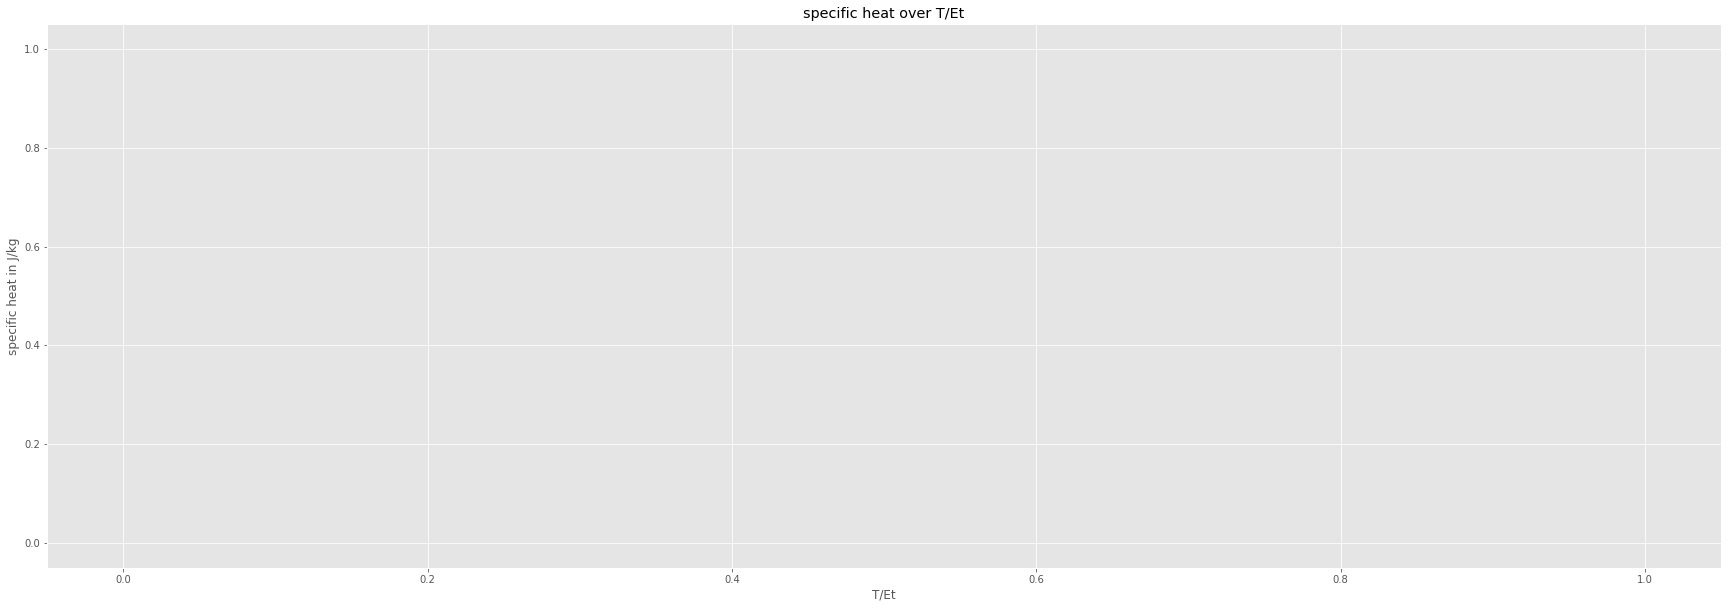

[inf inf inf ... inf inf inf]


In [29]:
e = EinstienFormula()
e.Plot()

print(e.SpecificHeat)
